In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

In [4]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [7]:
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


decoded_imgs = autoencoder.predict(x_test_noisy)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.5272 - acc: 0.4499 - val_loss: 0.4537 - val_acc: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.4245 - acc: 0.4882 - val_loss: 0.4030 - val_acc: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3969 - acc: 0.4913 - val_loss: 0.3851 - val_acc: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3818 - acc: 0.4939 - val_loss: 0.3700 - val_acc: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3694 - acc: 0.4960 - val_loss: 0.3576 - val_acc: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3595 - acc: 0.4977 - val_loss: 0.3476 - val_acc: 0.0000e+00
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3517 - acc: 0.4991 - va

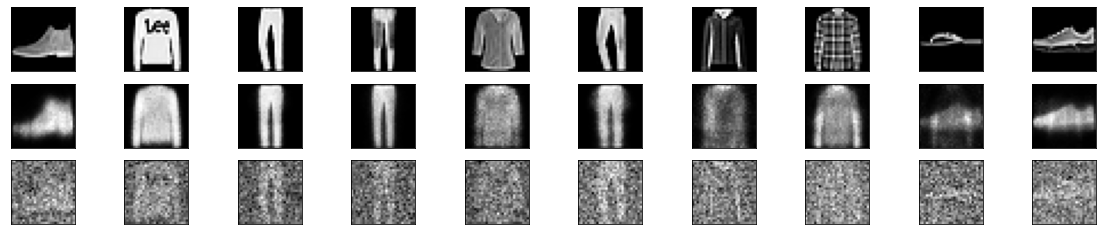

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy input
    ax = plt.subplot(3, n, i + 11 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


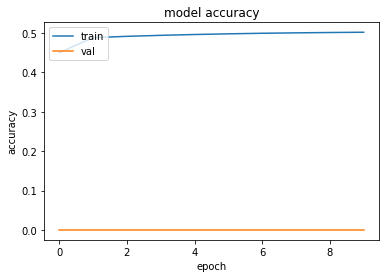

In [10]:
# Accuracy plot for train and validation datasets
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

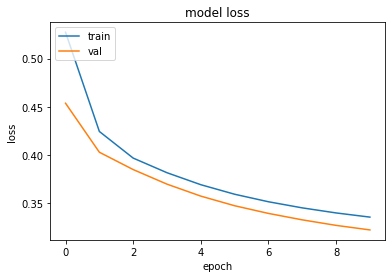

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()